In [1]:
import os
import pandas
import matplotlib.pyplot as plt
pandas.set_option('display.max_rows', 1000)

In [2]:
# Read in results data. These are rows with package, dependency, result, and predictions / times
df = pandas.read_csv('splice-rows-v2.csv',  index_col=[0])

/tmp/ipykernel_66920/2381906463.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv('splice-rows-v2.csv',  index_col=[0])


In [3]:
# What are the predictors we looked at? Note that smeagle has partial data and was experimental -
# It will not be included in the analysis here. See the smeagle notebook for the experimental analysis
# if you are interested in Smeagle.
df['predictor'].unique()

array(['binary-checks-symbol-provisioner-change',
       'missing-previously-found-symbols', 'libabigail-abicompat',
       'libabigail-abidiff', 'spack-test-original', 'spack-test-spliced',
       'abi-laboratory', 'smeagle'], dtype=object)

In [4]:
# Take a peek at the original data frame
df.head()

,package,dependency,original_lib,spliced_lib,binary,prediction,predictor,seconds,command
0,warpx@21.12,fftw@3.3.10,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.001109,binary-checks-symbol-provisioner-change
1,warpx@21.12,fftw@3.3.10,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.001618,binary-checks-symbol-provisioner-change
2,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.000213,missing-previously-found-symbols
3,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.138369,missing-previously-found-symbols
4,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.000909,missing-previously-found-symbols


In [5]:
# This is a preview to see where we predicted the library to work (original tests success, prediction=True)
# But after we did the splice, the tests no longer worked (and we might infer it was an ABI issue). We 
# would want the predictors to determine that. This cell, however, is only for preview - we don't do anything
# with this view
df[(df['predictor'] == 'spack-test-original') \
   & df['prediction']].merge(df[(df['predictor'] == 'spack-test-spliced') & ~df['prediction']], on=['package', 'dependency'], suffixes=["_original", '_spliced'])

,package,dependency,original_lib_original,spliced_lib_original,binary_original,prediction_original,predictor_original,seconds_original,command_original,original_lib_spliced,spliced_lib_spliced,binary_spliced,prediction_spliced,predictor_spliced,seconds_spliced,command_spliced
0,warpx@21.12,fftw@3.3.4,not used,not used,not used,True,spack-test-original,37.98242,/spack/bin/spack test run /q7a6of,not used,not used,not used,False,spack-test-spliced,1.249737,/spack/bin/spack test run /cjbpr5
1,warpx@21.12,fftw@3.3.5,not used,not used,not used,True,spack-test-original,38.051483,/spack/bin/spack test run /q7a6of,not used,not used,not used,False,spack-test-spliced,1.211212,/spack/bin/spack test run /vybifh
2,warpx@21.12,fftw@3.3.7,not used,not used,not used,True,spack-test-original,37.538374,/spack/bin/spack test run /q7a6of,not used,not used,not used,False,spack-test-spliced,1.205463,/spack/bin/spack test run /bzjzxn
3,warpx@21.12,fftw@3.3.8,not used,not used,not used,True,spack-test-original,37.689835,/spack/bin/spack test run /q7a6of,not used,not used,not used,False,spack-test-spliced,1.192448,/spack/bin/spack test run /bovwym
4,warpx@develop,fftw@3.3.4,not used,not used,not used,True,spack-test-original,6.952097,/spack/bin/spack test run /bkjvny,not used,not used,not used,False,spack-test-spliced,1.046502,/spack/bin/spack test run /ly3ni4
5,warpx@develop,fftw@3.3.5,not used,not used,not used,True,spack-test-original,6.767169,/spack/bin/spack test run /bkjvny,not used,not used,not used,False,spack-test-spliced,1.030513,/spack/bin/spack test run /zqywuj
6,warpx@develop,fftw@3.3.7,not used,not used,not used,True,spack-test-original,10.715197,/spack/bin/spack test run /bkjvny,not used,not used,not used,False,spack-test-spliced,1.011359,/spack/bin/spack test run /hsbhtc
7,warpx@develop,fftw@3.3.8,not used,not used,not used,True,spack-test-original,6.753341,/spack/bin/spack test run /bkjvny,not used,not used,not used,False,spack-test-spliced,1.030607,/spack/bin/spack test run /xt7mtd
8,warpx@21.07,fftw@3.3.4,not used,not used,not used,True,spack-test-original,25.701297,/spack/bin/spack test run /c56zqm,not used,not used,not used,False,spack-test-spliced,1.262237,/spack/bin/spack test run /ql7fi5
9,warpx@21.07,fftw@3.3.5,not used,not used,not used,True,spack-test-original,25.519411,/spack/bin/spack test run /c56zqm,not used,not used,not used,False,spack-test-spliced,1.218816,/spack/bin/spack test run /pwe7ri


In [6]:
sizes = pandas.read_csv('splice-sizes-v2.csv',  index_col=[0])

In [7]:
# Now that we've seen the data, we only want to include rows where the spack-test-original predictor was True
# The reason is because if it fails off the bat we can't say anything about the splice test failing.

# Filter entries where spack-test-original fails.
df = df[~((df['prediction'] == False) & (df['predictor'] == "spack-test-original"))]
# Filter out smeagle as a predictor
#df = df[df['predictor'].isin(['spack-test-spliced', 'symbols', 'libabigail-abicompat', 'libabigail-abidiff', 'abi-laboratory'])]

In [8]:
# Confirm smeagle is gone
df['predictor'].unique()

array(['binary-checks-symbol-provisioner-change',
       'missing-previously-found-symbols', 'libabigail-abicompat',
       'libabigail-abidiff', 'spack-test-original', 'spack-test-spliced',
       'abi-laboratory', 'smeagle'], dtype=object)

In [9]:
# Unique packages and versions we have results for
# N=304
df['package'].unique()

array(['warpx@21.12', 'warpx@develop', 'warpx@21.07', 'warpx@22.02',
       'warpx@22.01', 'warpx@21.10', 'warpx@22.03', 'warpx@21.09',
       'warpx@21.06', 'warpx@21.11', 'warpx@21.08', 'warpx@21.04',
       'formetis@0.0.2', 'openmpi@2.1.1', 'openmpi@1.8.5',
       'openmpi@4.1.2', 'openmpi@1.8.6', 'openmpi@3.0.5', 'openmpi@3.1.2',
       'openmpi@1.8.4', 'openmpi@2.1.6', 'openmpi@4.0.7', 'openmpi@3.0.2',
       'openmpi@1.10.3', 'openmpi@2.0.4', 'openmpi@3.1.6',
       'openmpi@3.0.0', 'openmpi@1.10.1', 'openmpi@4.0.1',
       'openmpi@2.0.1', 'openmpi@3.0.3', 'openmpi@4.0.4', 'openmpi@2.1.0',
       'openmpi@4.1.0', 'openmpi@4.0.2', 'openmpi@3.1.1', 'openmpi@4.1.3',
       'openmpi@4.0.6', 'openmpi@1.10.7', 'openmpi@3.1.5',
       'openmpi@1.8.2', 'openmpi@3.0.4', 'openmpi@1.10.2',
       'openmpi@3.1.3', 'openmpi@4.1.4', 'openmpi@2.0.2', 'openmpi@2.0.3',
       'openmpi@1.8.3', 'openmpi@1.8.7', 'openmpi@4.0.3', 'openmpi@2.1.2',
       'openmpi@2.1.3', 'openmpi@1.8.8', 'openmpi@1.

In [10]:
# Number of unique dependnecies (N=183)
df['dependency'].unique()

array(['fftw@3.3.10', 'fftw@3.3.4', 'fftw@3.3.5', 'fftw@3.3.7',
       'fftw@3.3.8', 'fftw@3.3.9', 'metis@5.1.0', 'pkgconf@1.3.10',
       'pkgconf@1.3.8', 'pkgconf@1.4.0', 'zlib@1.2.12', 'numactl@2.0.11',
       'numactl@2.0.12', 'numactl@2.0.14', 'pkgconf@1.4.2',
       'python@3.8.13', 'pacbio-daligner@2017-08-05',
       'pacbio-dazz-db@2017-04-10', 'python@3.10.5',
       'pacbio-dextractor@2016-08-09', 'python@3.9.13',
       'pacbio-damasker@2017-02-11', 'python@3.5.10', 'python@3.7.13',
       'python@3.6.15', 'libtool@2.4.6', 'libtool@2.4.7',
       'libtool@develop', 'pcre@8.38', 'pcre@8.39', 'pcre@8.40',
       'pcre@8.41', 'pcre@8.42', 'pcre@8.43', 'pcre@8.44', 'pcre@8.45',
       'libxml2@2.7.8', 'libxml2@2.9.10', 'libxml2@2.9.11',
       'libxml2@2.9.12', 'libxml2@2.9.13', 'libxml2@2.9.2',
       'libxml2@2.9.4', 'libxml2@2.9.8', 'libxml2@2.9.9', 'diffutils@3.8',
       'gettext@0.21', 'pkgconf@1.5.4', 'pkgconf@1.6.0', 'pkgconf@1.6.1',
       'pkgconf@1.6.3', 'pkgconf@1.7

In [11]:
# Number of predictions made by each predictor
df.groupby(['predictor']).count()

,package,dependency,original_lib,spliced_lib,binary,prediction,seconds,command
predictor,,,,,,,,
abi-laboratory,5658,5658,5658,5658,5658,5658,5658,5658
binary-checks-symbol-provisioner-change,36052,36052,36052,36052,36052,36052,36052,36052
libabigail-abicompat,33174,33174,33174,33174,33174,33174,33174,33174
libabigail-abidiff,5658,5658,5658,5658,5658,5658,5658,5658
missing-previously-found-symbols,66286,66286,66286,66286,66286,66286,66286,66286
smeagle,6536,6536,6536,6536,6536,6536,6536,6536
spack-test-original,1814,1814,1814,1814,1814,1814,1814,1814
spack-test-spliced,2699,2699,2699,2699,2699,2699,2699,2699


In [12]:
# This shows the number of predictions made by each - e.g., some predictors can make more predictions
# for a given package and library (and we will need to account for that). Here we also see that abi-laboratory
# and libabigail-abidiff (since they use the same logic) are comparable. Abicompat is much larger because it
# uses that same set against every binary in the original package.
df.groupby(['predictor']).count()

,package,dependency,original_lib,spliced_lib,binary,prediction,seconds,command
predictor,,,,,,,,
abi-laboratory,5658,5658,5658,5658,5658,5658,5658,5658
binary-checks-symbol-provisioner-change,36052,36052,36052,36052,36052,36052,36052,36052
libabigail-abicompat,33174,33174,33174,33174,33174,33174,33174,33174
libabigail-abidiff,5658,5658,5658,5658,5658,5658,5658,5658
missing-previously-found-symbols,66286,66286,66286,66286,66286,66286,66286,66286
smeagle,6536,6536,6536,6536,6536,6536,6536,6536
spack-test-original,1814,1814,1814,1814,1814,1814,1814,1814
spack-test-spliced,2699,2699,2699,2699,2699,2699,2699,2699


In [13]:
# Get ground truth with respect to spack-test-spliced
df_spack_test_spliced = df[(df['predictor'] == 'spack-test-spliced')][['package', 'dependency', 'prediction']]
df_with_ground_truth = pandas.merge(
    df, df_spack_test_spliced, suffixes=["", "_spack_test_spliced"], on=['package', 'dependency'])

# Exclude spack-test-spliced since it's used as ground truth
df_with_ground_truth = df_with_ground_truth[df_with_ground_truth['predictor'] != 'spack-test-spliced']
df_with_ground_truth

,package,dependency,original_lib,spliced_lib,binary,prediction,predictor,seconds,command,prediction_spack_test_spliced
0,warpx@21.12,fftw@3.3.10,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.001109,binary-checks-symbol-provisioner-change,True
1,warpx@21.12,fftw@3.3.10,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.001618,binary-checks-symbol-provisioner-change,True
2,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.000213,missing-previously-found-symbols,True
3,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.138369,missing-previously-found-symbols,True
4,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.000909,missing-previously-found-symbols,True
...,...,...,...,...,...,...,...,...,...,...
157870,raja@0.12.0,camp@0.3.0,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.000098,binary-checks-symbol-provisioner-change,True
157871,raja@0.12.0,camp@0.3.0,not used,not used,not used,True,spack-test-original,30.611392,/spack/bin/spack test run /uiiafz,True
157873,raja@0.12.0,camp@main,not used,not used,not used,False,smeagle,0.412513,unknown,True
157874,raja@0.12.0,camp@main,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.000097,binary-checks-symbol-provisioner-change,True


In [14]:
# Overall truth table for all predictors (doesn't look great in summary)
pandas.crosstab(
    df_with_ground_truth['prediction_spack_test_spliced'],
    df_with_ground_truth['prediction'],
    rownames=['prediction_spack_test_spliced'], colnames=['prediction'])

prediction,False,True
prediction_spack_test_spliced,,
False,2159,86495
True,5215,61309


In [15]:
# Truth tables by predictor
# ABI Laboratory probably has a different preference for compiling debug info we didn't use
# so the predictions are all true, it is compatible?
for predictor in df_with_ground_truth['predictor'].unique():
    print('predictor: ', predictor)
    df_tmp = df_with_ground_truth[df_with_ground_truth['predictor'] == predictor]
    display(pandas.crosstab(df_tmp['prediction_spack_test_spliced'], df_tmp['prediction'], rownames=['prediction_spack_test_spliced'], colnames=[predictor]))
    

predictor:  binary-checks-symbol-provisioner-change


binary-checks-symbol-provisioner-change,False,True
prediction_spack_test_spliced,,
False,310,13125
True,260,22357


predictor:  missing-previously-found-symbols


missing-previously-found-symbols,False,True
prediction_spack_test_spliced,,
False,91,43823
True,41,22331


predictor:  libabigail-abicompat


libabigail-abicompat,False,True
prediction_spack_test_spliced,,
False,100,21857
True,140,11077


predictor:  libabigail-abidiff


libabigail-abidiff,False,True
prediction_spack_test_spliced,,
False,148,3711
True,119,1680


predictor:  spack-test-original


spack-test-original,True
prediction_spack_test_spliced,
False,52
True,1762


predictor:  abi-laboratory


abi-laboratory,True
prediction_spack_test_spliced,
False,3859
True,1799


predictor:  smeagle


smeagle,False,True
prediction_spack_test_spliced,,
False,1510,68
True,4655,303


In [16]:
# Cases where a predictor is not consistent with itself.
unique_predictions = df.groupby(['package', 'dependency', 'original_lib', 'spliced_lib', 'binary', 'predictor'])['prediction'].apply(frozenset)
df_non_unique = pandas.DataFrame(unique_predictions[unique_predictions == frozenset([True, False])])
df_non_unique

prediction
package            dependency      original_lib                                       spliced_lib                                        binary                                             predictor                                      
binutils@2.24      diffutils@3.8   not used                                           not used                                           not used                                           smeagle                           (False, True)
                   gettext@0.21    not used                                           not used                                           not used                                           smeagle                           (False, True)
                   zlib@1.2.12     not used                                           not used                                           not used                                           smeagle                           (False, True)
binutils@2.25      diffutils@3.8   not used                                           not used                                           not used                                           smeagle                           (False, True)
                   gettext@0.21    not used                                           not used                                           not used                                           smeagle                           (False, True)
                   zlib@1.2.12     not used                                           not used                                           not used                                           smeagle                           (False, True)
binutils@2.25.1    diffutils@3.8   not used                                           not used                                           not used                                           smeagle                           (False, True)
                   gettext@0.21    not used                                           not used                                           not used                                           smeagle                           (False, True)
                   zlib@1.2.12     not used                                           not used                                           not used                                           smeagle                           (False, True)
binutils@2.26      diffutils@3.8   not used                                           not used                                           not used                                           smeagle                           (False, True)
                   gettext@0.21    not used                                           not used                                           not used                                           smeagle                           (False, True)
                   zlib@1.2.12     not used                                           not used                                           not used                                           smeagle                           (False, True)
binutils@2.27      diffutils@3.8   not used                                           not used                                           not used                                           smeagle                           (False, True)
                   gettext@0.21    not used                                           not used                                           not used                                           smeagle                           (False, True)
                   zlib@1.2.12     not used                                           not used                                           not used                                           smeagle                           (False, True)
binutils@2.28      diffutils@3.8   not used                                           not used                                           not used                                           smeagle                  

In [17]:
df

,package,dependency,original_lib,spliced_lib,binary,prediction,predictor,seconds,command
0,warpx@21.12,fftw@3.3.10,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.001109,binary-checks-symbol-provisioner-change
1,warpx@21.12,fftw@3.3.10,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.001618,binary-checks-symbol-provisioner-change
2,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.000213,missing-previously-found-symbols
3,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.138369,missing-previously-found-symbols
4,warpx@21.12,fftw@3.3.10,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,missing-previously-found-symbols,0.000909,missing-previously-found-symbols
...,...,...,...,...,...,...,...,...,...
158757,raja@0.12.0,camp@0.3.0,not used,not used,not used,True,spack-test-spliced,0.716046,/spack/bin/spack test run /op6nc2
158758,raja@0.12.0,camp@main,not used,not used,not used,False,smeagle,0.412513,unknown
158759,raja@0.12.0,camp@main,not used,not used,/spack/opt/spack/linux-ubuntu22.04-x86_64_v4/g...,True,binary-checks-symbol-provisioner-change,0.000097,binary-checks-symbol-provisioner-change
158760,raja@0.12.0,camp@main,not used,not used,not used,True,spack-test-original,30.58257,/spack/bin/spack test run /uiiafz


In [26]:
# For one package, filter out symbols (not consistent) and compare predictors for a given dependency/original_lib/spliced_lib/binary:
df[(df['package'] == 'qthreads@1.12') & (~df['predictor'].isin(['smeagle', 'missing-previously-found-symbols']))].pivot(index=['dependency', 'original_lib', 'spliced_lib', 'binary'], columns=['predictor'], values='prediction')

predictor                                                                                                                                                              abi-laboratory  \
dependency    original_lib                                       spliced_lib                                        binary                                                              
hwloc@1.11.1  /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
              /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... not used                                                     True   
              not used                                           not used                                           /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
                                                                                                                    not used                                                      NaN   
hwloc@1.11.10 /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
              /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... not used                                                     True   
              not used                                           not used                                           /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
                                                                                                                    not used                                                      NaN   
hwloc@1.11.11 /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
              /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... not used                                                     True   
              not used                                           not used                                           /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
                                                                                                                    not used                                                      NaN   
hwloc@1.11.12 /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
              /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... not used                                                     True   
              not used                                           not used                                           /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
                                                                                                                    not used                                                      NaN   
hwloc@1.11.13 not used                                           not used                                           /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...            NaN   
                                                                                                                    not used                                                      NaN   
hwloc@1.11.2  /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... not used                                                     True   
              /spack/opt/spack/linux-ubuntu22.04-broadwell/gc... /spack/opt/spack/linux-ubuntu22.04-broadwell/gc...

In [27]:
# TODO next, get more data and create a dataset (subset) that has exact same libs/binaries to create table to compare
# more directly between predictors

In [28]:
# Predictors that can be compared for a given package, dependency, etc.
df.groupby(['package', 'dependency', 'original_lib', 'spliced_lib', 'binary'])['predictor'].apply(tuple).unique()

array([('spack-test-original', 'spack-test-spliced'),
       ('missing-previously-found-symbols', 'missing-previously-found-symbols'),
       ('libabigail-abidiff', 'abi-laboratory'),
       ('libabigail-abicompat',),
       ('binary-checks-symbol-provisioner-change',),
       ('smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'spack-test-spliced'),
       ('smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'spack-test-spliced'),
       ('smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle', 'smeagle',

In [29]:
# Predictors that can be compared for a given package, dependency, etc.
df.groupby(['package', 'dependency', 'original_lib', 'spliced_lib'])['predictor'].apply(frozenset).unique()

array([frozenset({'spack-test-spliced', 'spack-test-original'}),
       frozenset({'abi-laboratory', 'missing-previously-found-symbols', 'libabigail-abidiff'}),
       frozenset({'libabigail-abicompat'}),
       frozenset({'smeagle', 'spack-test-spliced', 'binary-checks-symbol-provisioner-change'}),
       frozenset({'spack-test-spliced', 'binary-checks-symbol-provisioner-change'}),
       frozenset({'smeagle', 'spack-test-spliced', 'spack-test-original', 'binary-checks-symbol-provisioner-change'}),
       frozenset({'spack-test-spliced', 'spack-test-original', 'binary-checks-symbol-provisioner-change'}),
       frozenset({'spack-test-spliced'})], dtype=object)

In [30]:
# Predictors that can be compared for a given package, dependency, etc.
df.groupby(['package', 'dependency'])['predictor'].apply(frozenset).unique()

array([frozenset({'spack-test-spliced', 'spack-test-original'}),
       frozenset({'libabigail-abicompat', 'binary-checks-symbol-provisioner-change', 'smeagle', 'spack-test-spliced', 'missing-previously-found-symbols', 'abi-laboratory', 'libabigail-abidiff'}),
       frozenset({'smeagle', 'spack-test-spliced', 'binary-checks-symbol-provisioner-change'}),
       frozenset({'spack-test-spliced', 'binary-checks-symbol-provisioner-change'}),
       frozenset({'libabigail-abicompat', 'binary-checks-symbol-provisioner-change', 'spack-test-spliced', 'missing-previously-found-symbols', 'abi-laboratory', 'libabigail-abidiff'}),
       frozenset({'smeagle', 'spack-test-spliced', 'spack-test-original', 'binary-checks-symbol-provisioner-change'}),
       frozenset({'libabigail-abicompat', 'spack-test-original', 'binary-checks-symbol-provisioner-change', 'smeagle', 'spack-test-spliced', 'missing-previously-found-symbols', 'abi-laboratory', 'libabigail-abidiff'}),
       frozenset({'libabigail-abico

In [35]:
# Filter where all predictors are available
num_predictors = df.groupby(['package', 'dependency'])['predictor'].nunique()
df_inall = pandas.DataFrame(num_predictors[num_predictors == 6])  # 'libabigail-abidiff', 'symbols', 'abi-laboratory', 'spack-test-spliced', 'libabigail-abicompat'
df_inall = df_inall.reset_index()[['package', 'dependency']].merge(df)

In [36]:
# Counts of predictions by package/dependency for each predictor
df_count_predictions = pandas.DataFrame(df_inall.groupby(['package', 'dependency', 'predictor'])['prediction'].count()).reset_index()
df_count_predictions = df_count_predictions.pivot(index=['package', 'dependency'], columns='predictor', values='prediction')
df_count_predictions

predictor                                abi-laboratory  \
package            dependency                             
biobambam2@2.0.177 libtool@2.4.6                      7   
                   libtool@2.4.7                      7   
emacs@master       libxml2@2.7.8                      2   
                   libxml2@2.9.10                     2   
                   libxml2@2.9.11                     2   
                   libxml2@2.9.12                     2   
                   libxml2@2.9.13                     1   
                   libxml2@2.9.2                      2   
                   libxml2@2.9.4                      2   
                   libxml2@2.9.8                      2   
                   libxml2@2.9.9                      2   
                   zlib@1.2.12                        1   
openmpi@1.10.0     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.10.1     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.10.2     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.10.3     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.10.4     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.10.5     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.10.6     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.10.7     numactl@2.0.11                     9   
                   numactl@2.0.12                     9   
                   numactl@2.0.14                     9   
                   pkgconf@1.3.10                     9   
                   pkgconf@1.3.8                      9   
                   zlib@1.2.12                        9   
openmpi@1.8.2      numactl@2.0.11                     8   
                   numactl@2.0.12                     8   
                   numactl@2.0.14                     8   
                   pkgconf@1.3.10                     8   
                   pkgconf@1.3.8                      8   
                   zlib@1.2.12                 

In [37]:
# Proportion of true versus total predictions for each predictor
df_true_predictions = pandas.DataFrame(df_inall.groupby(['package', 'dependency', 'predictor'])['prediction'].sum()).reset_index()
df_true_predictions = df_true_predictions.pivot(index=['package', 'dependency'], columns='predictor', values='prediction')
df_proportion_true = (df_true_predictions / df_count_predictions)

In [39]:
# proportion that each predictor is saying is true, but only where != 1 (it's equal to 1 a lot of the time)
# Filter where some package/dependency combination is not predicted 'true' by all predictors.
df_proportion_true[(df_proportion_true != 1).any(axis=1)]

predictor                                abi-laboratory  \
package            dependency                             
biobambam2@2.0.177 libtool@2.4.6                    1.0   
                   libtool@2.4.7                    1.0   
emacs@master       libxml2@2.7.8                    1.0   
                   libxml2@2.9.10                   1.0   
                   libxml2@2.9.11                   1.0   
                   libxml2@2.9.12                   1.0   
                   libxml2@2.9.13                   1.0   
                   libxml2@2.9.2                    1.0   
                   libxml2@2.9.4                    1.0   
                   libxml2@2.9.8                    1.0   
                   libxml2@2.9.9                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.0     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.1     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.2     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.3     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.4     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.5     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.6     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.10.7     numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                      1.0   
openmpi@1.8.2      numactl@2.0.11                   1.0   
                   numactl@2.0.12                   1.0   
                   numactl@2.0.14                   1.0   
                   pkgconf@1.3.10                   1.0   
                   pkgconf@1.3.8                    1.0   
                   zlib@1.2.12                 

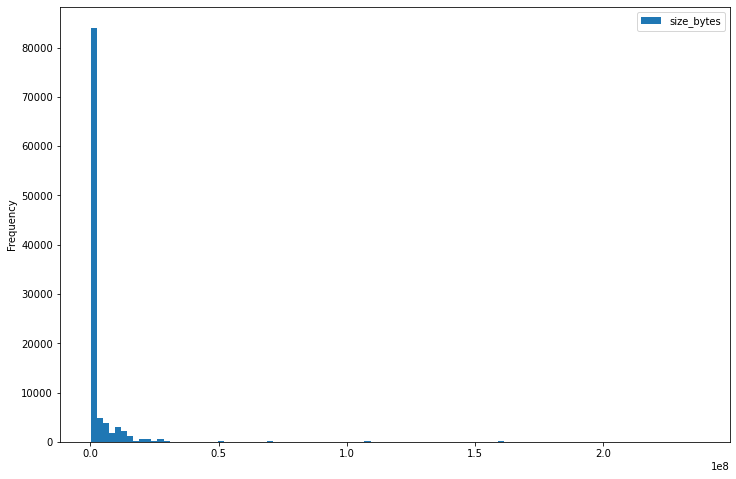

In [40]:
sizes.plot.hist(bins=100, figsize=(12, 8));

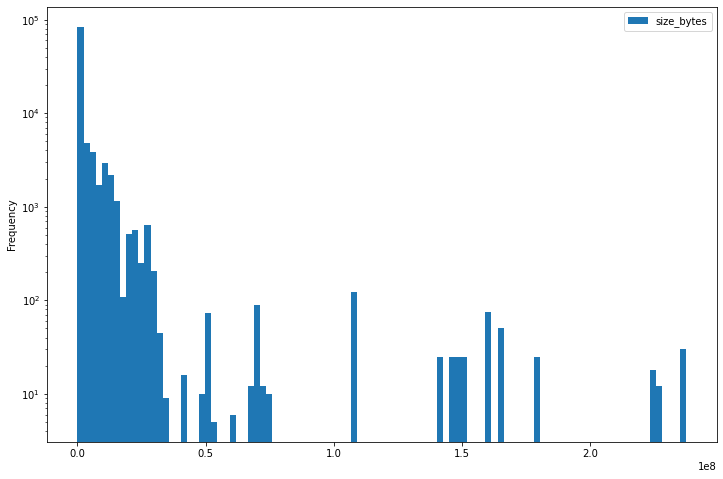

In [41]:
sizes.plot.hist(bins=100, figsize=(12, 8), logy=True);